In [1]:
import pandas as pd

hard_df = pd.read_csv("hard_complete.csv")
easy_df = pd.read_csv("easy_complete.csv")

In [2]:
easy_df

,dataset,datapoint,sequence,ContextFold_accuracy,ContextFold_prediction,ContraFold_accuracy,ContraFold_prediction,EternaFold_accuracy,EternaFold_prediction,IPKnot_accuracy,...,MXFold_prediction,MXFold2_accuracy,MXFold2_prediction,SPOT-RNA_accuracy,SPOT-RNA_prediction,mfe,ens_def,sequence_entropy,gc_content,length
0,EternaData,ETERNA_R00_0000_ANNOTATION_1081,GGAAAAAAAGCAUGUACCUACUUUGUAGGUACAUGCAGAUGUAUCU...,0.962121,.........((((((((((((...)))))))))))).(((((((((...,0.962121,.........((((((((((((...)))))))))))).(((((((((...,0.962121,.........((((((((((((...)))))))))))).(((((((((...,0.962121,...,(........((((((((((((...)))))))))))).(((((((((...,0.962121,.........((((((((((((...)))))))))))).(((((((((...,0.949761,.........((((((((((((...)))))))))))).(((((((((...,-46.1,0.49,0.936729,0.345794,107
1,EternaData,ETERNA_R00_0000_ANNOTATION_1223,GGAAAAAAAAACUUAGGAAAAAACGAAAAAAGAUACGAAAGUAUCG...,0.959677,...............................(((((....)))))....,0.968661,...........(((((...............(((((....)))))....,0.968661,...........(((((...............(((((....)))))....,0.959677,...,(..........(((((...............(((((....)))))....,0.940000,...........(((((.......(.......(((((....)))))....,0.967586,...........(((((...............(((((....)))))....,-16.6,0.52,0.801531,0.289720,107
2,EternaData,ETERNA_R00_0000_ANNOTATION_1227,GGAAAAAAAAACUGUCAAAAAAGCGAAAAAACACAGAAAACUGUGA...,0.913559,............(((................(((((....)))))....,0.928063,...........(((((...............(((((....)))))....,0.928063,...........(((((...............(((((....)))))....,0.928063,...,(..........(((((...............(((((....)))))....,0.893793,...........(((((.......(.......(((((....)))))....,0.917241,...........(((((...............(((((....)))))....,-19.7,0.19,0.793616,0.317757,107
3,EternaData,ETERNA_R00_0000_ANNOTATION_132,GGAAACAAAAAAAAAAAGCAGUCCGAAAGGACAGUACGAAAGUACA...,0.942204,....................((((....)))).((((....))))....,0.942204,....................((((....)))).((((....))))....,0.909091,.................((.((((....)))).((((....))))....,0.942204,...,(...................((((....)))).((((....))))....,0.909091,.................((.((((....)))).((((....))))....,0.944664,....................((((....)))).((((....))))....,-27.2,1.16,0.855694,0.392523,107
4,EternaData,ETERNA_R00_0000_ANNOTATION_1369,GGAAAAAAAAGCAUAUGCGAAGCAUGCGAAGCAUGCGAAAGCAUGC...,0.917553,..........((((((((...((((((...((((((....))))))...,0.917553,..........((((((((...((((((...((((((....))))))...,0.917553,..........((((((((...((((((...((((((....))))))...,0.917553,...,(.........((((((((...((((((...((((((....))))))...,0.917553,..........((((((((...((((((...((((((....))))))...,0.906122,..........((((((((...((((((...((((((....))))))...,-47.3,0.16,0.925141,0.457944,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250,Ribonanza,ff6423a60b84,GGAAAUAACAUAUACGAAACGUAUUGAGAGAUACGAAACGUAUUGA...,0.956250,.....(..((((((((...((((((....))))))...((((((.....,0.971860,........((((((((...((((((....((((((...)))))).....,0.971860,........((((((((...((((((....((((((...)))))).....,0.970109,...,(.......((((((((...((((((....))))))...((((((.....,0.971860,........((((((((...((((((....((((((...)))))).....,0.963889,........((((((((...((((((....((((((...)))))).....,-24.8,0.84,0.893869,0.299065,107
4251,Ribonanza,ff894a4b3fc6,GGAAAGAAUUAGGGAAGUGUCAUGUGUACCCGGCUGCGAAGCCGGG...,0.948707,......(((((((((((((...(((((((((((((....)))))))...,0.951302,......((((((((((((((..(((((((((((((....)))))))...,0.951302,......((((((((((((((..(((((((((((((....)))))))...,0.951302,...,(.....((((((((((((((..(((((((((((((....)))))))...,0.951302,......((((((((((((((..(((((((((((((....)))))))...,0.936996,......((((((((((((((..(((((((((((((....)))))))...,-55.1,0.91,0.978232,0.457944,107
4252,Ribonanza,ff8ffb478f87,GGAAAGAUCACUACUAAAAUGUAGAGAUCUAAAAUGAUCAGAUCAA...,0.961637,.....((((.((((......)))).))))....................,0.940741,....(((((.((((......)))).)))))............((.....,0.929630,....(((((.((((......)))).

In [3]:
easy_df.columns

Index(['dataset', 'datapoint', 'sequence', 'ContextFold_accuracy',
       'ContextFold_prediction', 'ContraFold_accuracy',
       'ContraFold_prediction', 'EternaFold_accuracy', 'EternaFold_prediction',
       'IPKnot_accuracy', 'IPKnot_prediction', 'NeuralFold_accuracy',
       'NeuralFold_prediction', 'NUPACK_accuracy', 'NUPACK_prediction',
       'RNAFold_accuracy', 'RNAFold_prediction', 'RNAStructure_accuracy',
       'RNAStructure_prediction', 'pKnots_accuracy', 'pKnots_prediction',
       'Simfold_accuracy', 'Simfold_prediction', 'MXFold_accuracy',
       'MXFold_prediction', 'MXFold2_accuracy', 'MXFold2_prediction',
       'SPOT-RNA_accuracy', 'SPOT-RNA_prediction', 'mfe', 'ens_def',
       'sequence_entropy', 'gc_content', 'length'],
      dtype='object')

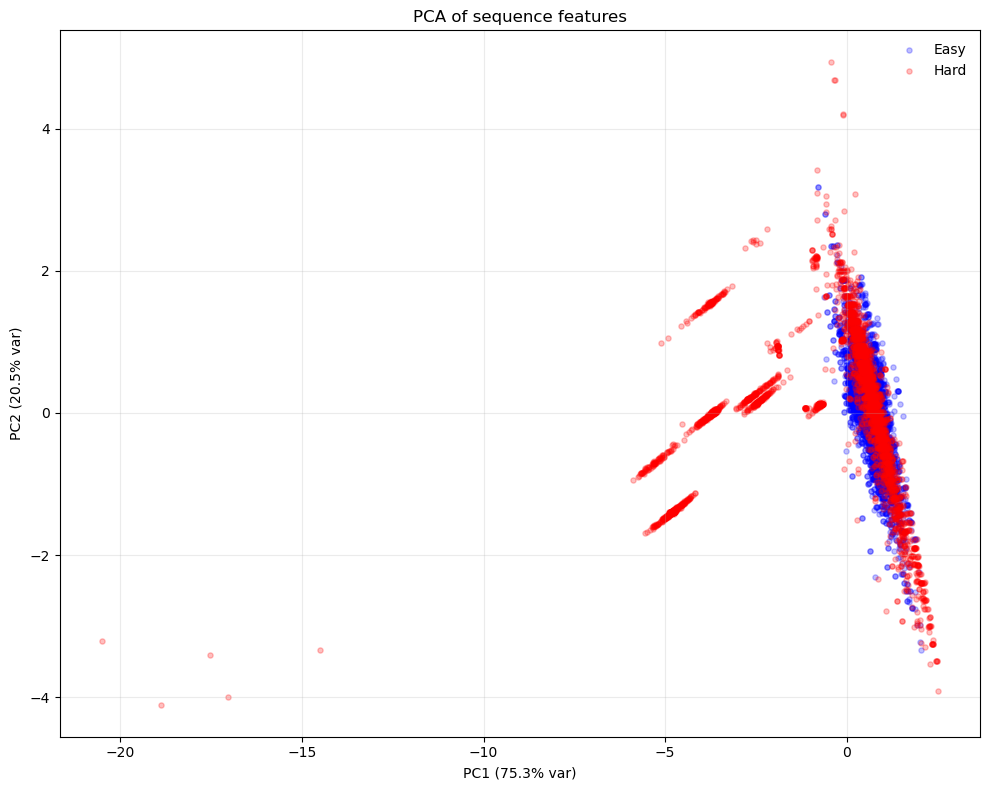

array([[-0.55207288,  0.55718149, -0.54044536, -0.30443904],
       [-0.27675573,  0.03563535, -0.20857357,  0.9373545 ]])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Columns to use
features = ["length", "mfe", "ens_def", "gc_content"]

# Combine and label
df_all = pd.concat(
    [
        easy_df.assign(_label="Easy"),
        hard_df.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

pca.components_


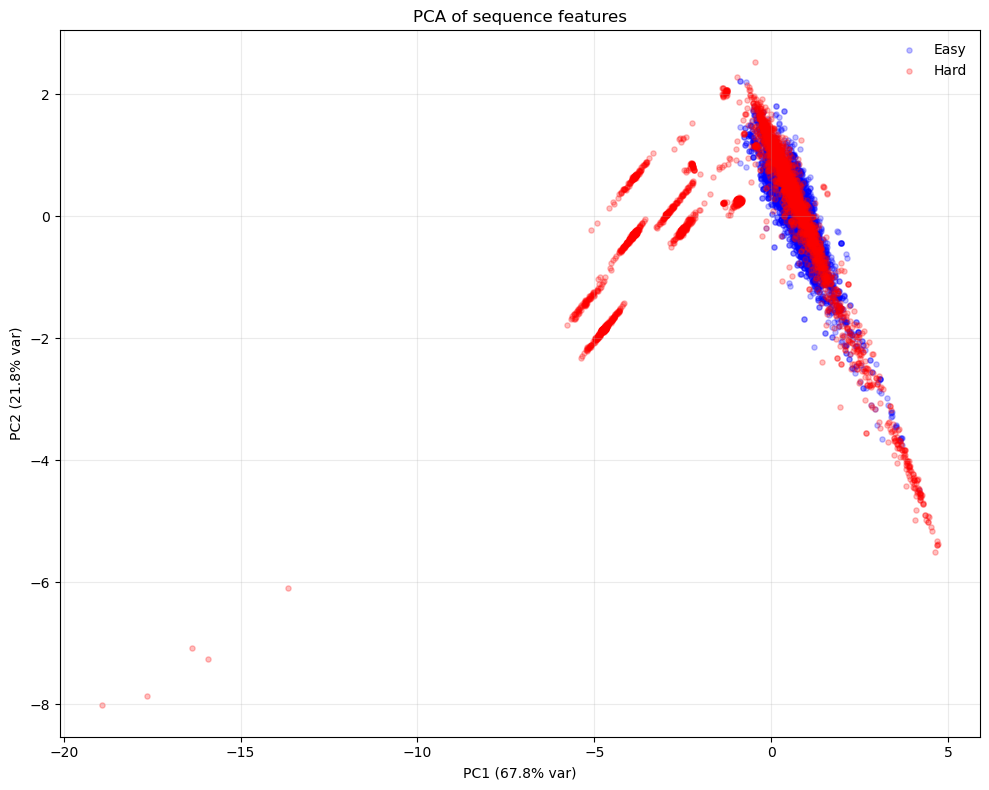

[[-0.4948701   0.52073677 -0.48444825 -0.33273336 -0.37220317]
 [-0.37220387  0.14614964 -0.33450484  0.64730945  0.55605894]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Columns to use
features = ["length", "mfe", "ens_def", "gc_content", "sequence_entropy"]

# Combine and label
df_all = pd.concat(
    [
        easy_df.assign(_label="Easy"),
        hard_df.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

print(pca.components_)


In [6]:
models = ['ContextFold',
 'ContraFold',
 'EternaFold',
 'IPKnot',
 'NeuralFold',
 'NUPACK',
 'RNAFold',
 'RNAStructure',
 'pKnots',
 'Simfold',
 'MXFold',
 'MXFold2',
 'SPOT-RNA']


score_cols = [f"{m}_accuracy" for m in models if f"{m}_accuracy" in easy_df.columns]
easy_df["avg_accuracy"] = easy_df[score_cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)


In [7]:
score_cols = [f"{m}_accuracy" for m in models if f"{m}_accuracy" in hard_df.columns]
hard_df["avg_accuracy"] = hard_df[score_cols].apply(pd.to_numeric, errors="coerce").mean(axis=1)

In [8]:
hard_df

,dataset,datapoint,sequence,ContextFold_accuracy,ContextFold_prediction,ContraFold_accuracy,ContraFold_prediction,EternaFold_accuracy,EternaFold_prediction,IPKnot_accuracy,...,MXFold2_accuracy,MXFold2_prediction,SPOT-RNA_accuracy,SPOT-RNA_prediction,mfe,ens_def,sequence_entropy,gc_content,length,avg_accuracy
0,EternaData,ETCROS_VN1_0001_ANNOTATION_9,GGGCCGGCUCGAGCCCAGCCCGGAAACGGGCUGGCCAGAGAUAGCG...,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.662879,...,0.662879,.....(((((((((((((((((....))))))))(((((((((......,0.660526,.....(((((((((((((((((....))))))))(((((((((......,-70.0,0.19,0.938412,0.657143,105,0.652931
1,EternaData,ETERNA_R00_0000_ANNOTATION_1031,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAGAUAAAAGCUA...,0.612414,................................((((((....((((...,0.649866,................................(((((((...((((...,0.649866,................................(((((((...((((...,0.649866,...,0.649866,................................(((((((...((((...,0.620553,................................(((((((...((((...,-24.5,0.39,0.783623,0.261682,107,0.644480
2,EternaData,ETERNA_R00_0000_ANNOTATION_1036,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACUAUGUUCCCAUAG...,0.549310,................................(((((((....(((...,0.550067,................................(((((((...((((...,0.550067,................................(((((((...((((...,0.550067,...,0.550067,................................(((((((...((((...,0.560526,...............................(((((......))))...,-20.8,0.88,0.839285,0.308411,107,0.553276
3,EternaData,ETERNA_R00_0000_ANNOTATION_1100,GGAAAAAAAAAAGCUGAGUACGAAGUACAGCACGAAGUGCAGAGCA...,0.590412,............((((.............((((...)))).((((....,0.633721,............((((..(((...)))))))((...))((.((((....,0.610788,............(((..((((...)))))))((...))((.((((....,0.638782,...,0.601634,............((((.((((...)))).((((...)))).((((....,0.592424,......................(......((((...)))).((((....,-28.4,2.42,0.919512,0.467290,107,0.611771
4,EternaData,ETERNA_R00_0000_ANNOTATION_1125,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGA...,0.661458,............................................((...,0.661458,............................................((...,0.661458,............................................((...,0.661458,...,0.661458,............................................((...,0.595825,............................................((...,-14.9,0.11,0.640772,0.224299,107,0.651694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,Ribonanza,fe95df322221,GGGAACGACUCGAGUAGAGUCGAAAAAUACUUACCUGGCAGGGGAG...,0.641496,(((.....))).....((((.................(((((((.....,0.562243,.....((((((.....))))))...............(((.(((((...,0.567669,.....((((((.....))))))................(..(((((...,0.535517,...,0.587200,(....((((((.....))))))...............(((((((((...,0.552111,.....((((((.....))))))...............(....((.....,-80.5,42.81,0.996235,0.508547,234,0.563199
4419,Ribonanza,feca3f8b8b42,GGGAACGACUCGAGUAGAGUCGAACCAAGCUCAGUUGCCGGGCGGG...,0.608733,(((..((((((.....)))))).......))).(((.(((.(((((...,0.546738,.((..((((((.....))))))..))..........((((((((((...,0.583196,((...((((((.....))))))..))..........((((((((((...,0.667680,...,0.621479,((...((((((.....))))))..)).......(((((((((((((...,0.589929,.....((((((.....))))))..................(........,-112.4,45.03,0.977006,0.618321,262,0.593453
4420,Ribonanza,fed077d8381c,GGGAACGACUCGAGUAGAGUCGAAAAGGUCAAUGAUGAAUGGUAAA...,0.594983,((((..(((((.....)))))............................,0.556127,.....((((((.....))))))....((((.....((((((((......,0.576481,.....((((((.....))))))....((((...(.((((((((......,0.574192,...,0.557779,.....((((((.....))))))....((((...(.((((((((......,0.619592,.....((((((.....))))))....((((...............(...,-116.5,45.62,0.998890,0.510448,335,0.573887
4421,Ribonanza,fef4013abae1,GGAAACAAACAAACCGGAGGGAAAAGUUAUCAGGCAUGCACCUGGU...,0.600680,....

In [9]:
print(hard_df["avg_accuracy"].max())
print(easy_df["avg_accuracy"].min())

0.6662824186179245
0.8704382474285068


In [10]:
low_threshold = 0.65  # set your cutoff

hard_low = hard_df[hard_df["avg_accuracy"] > low_threshold].copy()

# hard_low = hard_low.reset_index(drop=True)
n_low = len(hard_low)
print(n_low)

hi_threshold = 0.9

easy_hi = easy_df[easy_df["avg_accuracy"] < hi_threshold].copy()
n_hi = len(easy_hi)
print(n_hi)

176
176


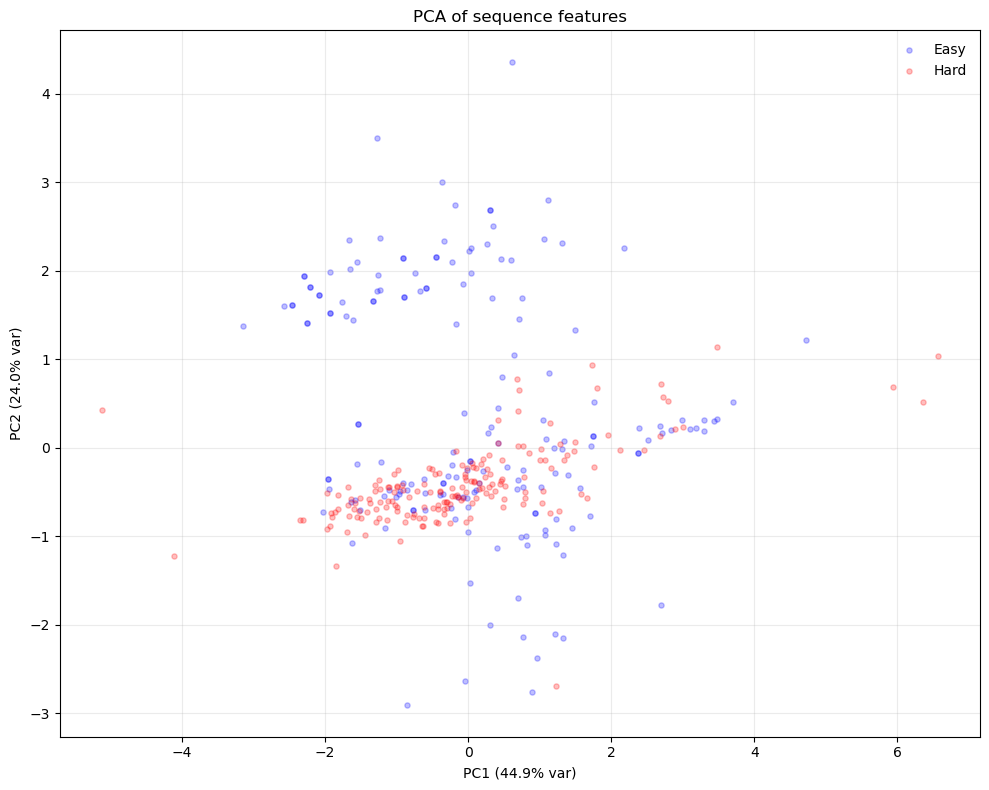

array([[-0.21683269,  0.59328475,  0.08438182, -0.55066611, -0.53911347],
       [ 0.80181471, -0.1930895 ,  0.44672724, -0.31641467, -0.14186662]])

In [11]:
# Columns to use
features = ["length", "mfe", "ens_def", "gc_content", "sequence_entropy"]

# Combine and label
df_all = pd.concat(
    [
        easy_hi.assign(_label="Easy"),
        hard_low.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

pca.components_


In [12]:
low_threshold = 0.55  # set your cutoff

hard_low = hard_df[hard_df["avg_accuracy"] < low_threshold].copy()

# hard_low = hard_low.reset_index(drop=True)
n_low = len(hard_low)
print(n_low)

hi_threshold = 0.98

easy_hi = easy_df[easy_df["avg_accuracy"] > hi_threshold].copy()
n_hi = len(easy_hi)
print(n_hi)




329
363


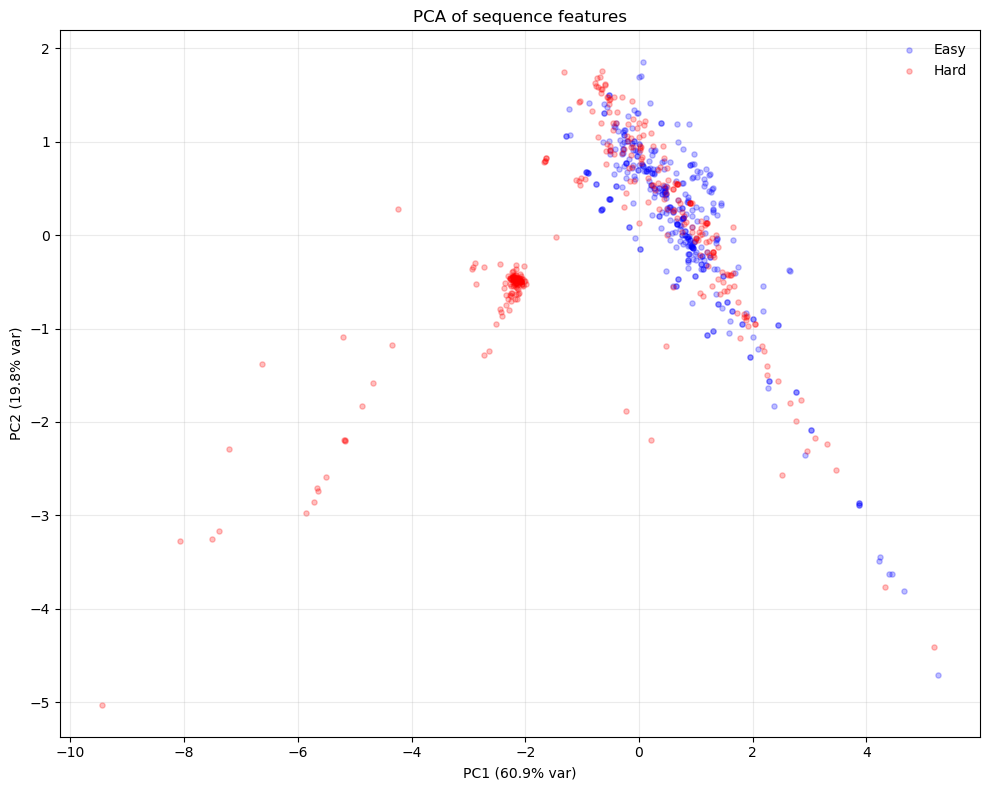

array([[-0.48059331,  0.52498697, -0.40336013, -0.41098153, -0.40226054],
       [-0.44201635,  0.04900167, -0.48152436,  0.48757937,  0.57673306]])

In [13]:
# Columns to use
features = ["length", "mfe", "ens_def", "gc_content", "sequence_entropy"]

# Combine and label
df_all = pd.concat(
    [
        easy_hi.assign(_label="Easy"),
        hard_low.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

pca.components_


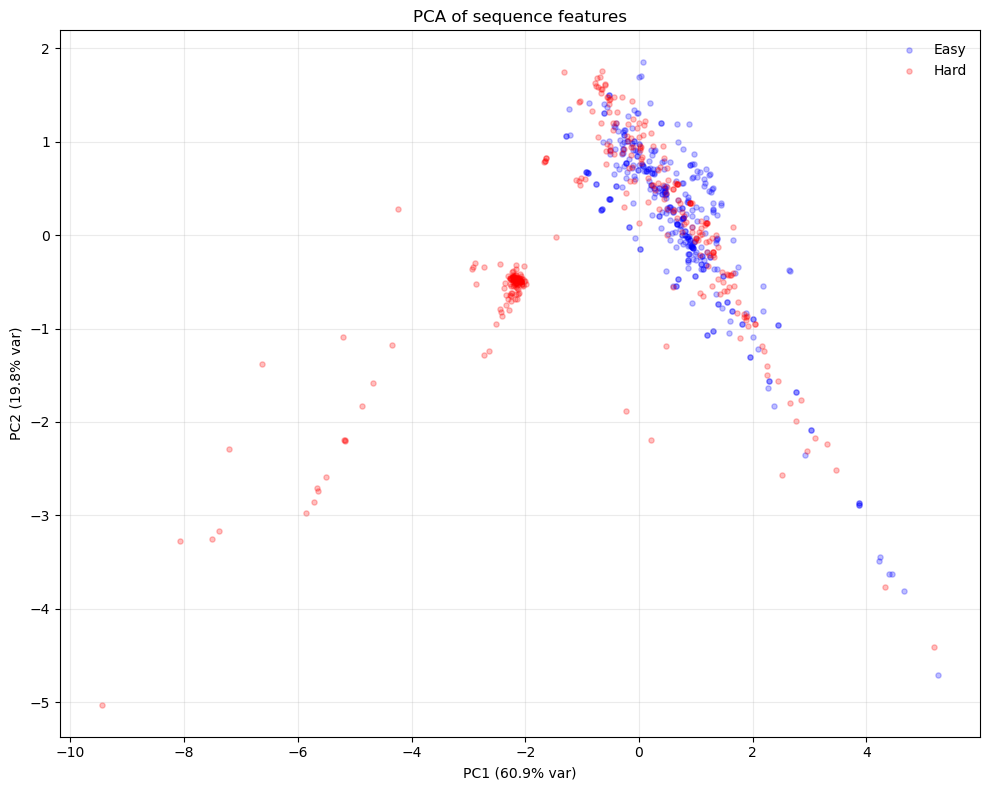

array([[-0.48059331,  0.52498697, -0.40336013, -0.41098153, -0.40226054],
       [-0.44201635,  0.04900167, -0.48152436,  0.48757937,  0.57673306]])

In [14]:
# Columns to use
features = ["length", "mfe", "ens_def", "gc_content", "sequence_entropy"]

# Combine and label
df_all = pd.concat(
    [
        easy_hi.assign(_label="Easy"),
        hard_low.assign(_label="Hard"),
    ],
    ignore_index=True
)

# Keep only rows with all required features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X = X.loc[mask]
y = df_all.loc[mask, "_label"]

# Standardize features (very important for PCA)
X_scaled = StandardScaler().fit_transform(X)

# PCA to 2D
pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)
pc1_var, pc2_var = pca.explained_variance_ratio_

# Prepare a DataFrame for plotting (optional)
plot_df = pd.DataFrame(
    {"PC1": Z[:, 0], "PC2": Z[:, 1], "label": y.values},
    index=X.index
)

# Plot (blue for Easy, red for Hard)
fig, ax = plt.subplots(figsize=(10, 8))
for label, color in [("Easy", "blue"), ("Hard", "red")]:
    m = plot_df["label"] == label
    ax.scatter(plot_df.loc[m, "PC1"], plot_df.loc[m, "PC2"],
               s=14, alpha=0.25, label=label, c=color)

ax.set_xlabel(f"PC1 ({pc1_var*100:.1f}% var)")
ax.set_ylabel(f"PC2 ({pc2_var*100:.1f}% var)")
ax.set_title("PCA of sequence features")
ax.legend(frameon=False)
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

pca.components_


In [20]:
low_threshold = 0.55  # set your cutoff

hard_low = hard_df[hard_df["avg_accuracy"] < low_threshold].copy()

# hard_low = hard_low.reset_index(drop=True)
n_low = len(hard_low)
print(n_low)

hi_threshold = 0.98

easy_hi = easy_df[easy_df["avg_accuracy"] > hi_threshold].copy()
n_hi = len(easy_hi)
print(n_hi)

features = ["length", "mfe", "ens_def", "gc_content", "sequence_entropy"]

# 1) Keep original indices (important for joining back)
df_all = pd.concat(
    [easy_hi.assign(_label="Easy"),
     hard_low.assign(_label="Hard")],
    ignore_index=False  # <--
)

# 2) Prep data, mask rows with all features present
X = df_all[features].astype(float)
mask = X.notna().all(axis=1)
X_valid = X.loc[mask]

# 3) Scale + PCA
scaler = StandardScaler().fit(X_valid)
X_scaled = scaler.transform(X_valid)

pca = PCA(n_components=2).fit(X_scaled)
Z = pca.transform(X_scaled)  # shape (n_valid, 2)

# 4) Make a DataFrame of PCA coords, indexed by the same valid rows
pc_df = pd.DataFrame(
    Z, index=X_valid.index, columns=["pca_component1", "pca_component2"]
)

# 5) Join the PCA coords back to the originals
easy_hi  = easy_hi.join(pc_df, how="left")
hard_low = hard_low.join(pc_df, how="left")



329
363


In [22]:
hard_low

,dataset,datapoint,sequence,ContextFold_accuracy,ContextFold_prediction,ContraFold_accuracy,ContraFold_prediction,EternaFold_accuracy,EternaFold_prediction,IPKnot_accuracy,...,SPOT-RNA_accuracy,SPOT-RNA_prediction,mfe,ens_def,sequence_entropy,gc_content,length,avg_accuracy,pca_component1,pca_component2
26,EternaData,ETERNA_R00_0000_ANNOTATION_1314,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,0.534649,.................................................,0.534649,.................................................,0.534649,.................................................,0.588710,...,0.500411,.................................................,-17.4,0.24,0.693550,0.252336,107,0.545551,4.321586,-3.765201
47,EternaData,ETERNA_R00_0000_ANNOTATION_183,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGUAGACGCG...,0.529259,.....................................((((.(..(...,0.529259,.....................................((((.(..(...,0.526709,.....................................((((.(.((...,0.562500,...,0.523246,........................................(....(...,-14.8,1.75,0.797340,0.308411,107,0.544010,3.096187,-2.176074
59,EternaData,ETERNA_R00_0000_ANNOTATION_2049,GGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAG...,0.546584,.............................................(...,0.538043,.............................................(...,0.538043,.............................................(...,0.538043,...,0.534900,.............................................(...,-23.8,1.09,0.779553,0.317757,107,0.537480,2.951323,-2.309301
85,EternaData,ETERNA_R24_0001_ANNOTATION_9,GGAAAGGCCUGCAAGUGUCAGAUCGAAAGAUCAGUUGGAAACGACA...,0.550057,.....(((((((..((.((.((((....)))).....)).)).......,0.530293,.....(((((((..(((((.((((....)))).((((....))))....,0.530293,.....(((((((..(((((.((((....)))).((((....))))....,0.530293,...,0.548913,.....(((((((........((((....)))).................,-39.3,0.20,0.920071,0.453782,119,0.535527,0.357104,0.279001
90,EternaData,ETERNA_R41_0001_ANNOTATION_1,GGGAAGGACGCCCAUAAGCACCGGCAUGCCGAUGCGACAGGCCGUG...,0.516859,((((..(..(((.....(((.(((....))).)))....)))..)....,0.547693,(((.......)))....(((.(((....))).)))....(((((((...,0.554300,(((.......)))....(((.(((....))).)))....(((((((...,0.565897,...,0.580521,((.........))....((..((((..))))..))....(((.(((...,-40.7,1.80,0.960426,0.578947,133,0.547683,-0.279754,0.926469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,Ribonanza,f2590cf27561,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.548139,......(((((.....))))).....(((((..((((((..........,0.524369,.....((((((.....))))))....(((((..((((((....((....,0.524369,.....((((((.....))))))....(((((..((((((....((....,0.571008,...,0.531549,.....((((((.....))))))............(((((..........,-67.0,9.74,0.964278,0.452261,199,0.537331,-2.259413,-0.706277
4363,Ribonanza,f5ab849cc3f4,GGGAAGGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.555011,......(((((.....))))).....(((((..((((((..........,0.515364,......(((((.....))))).....(((((..((((((....((....,0.515364,......(((((.....))))).....(((((..((((((....((....,0.556432,...,0.535780,......(((((.....)))))............((((((..........,-68.6,6.15,0.964278,0.452261,199,0.531413,-2.124929,-0.492573
4366,Ribonanza,f60369991cb8,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.567961,......(((((.....))))).....(((((..((((((..........,0.551126,.....((((((.....))))))....(((((..((((((....((....,0.541107,.....((((((.....))))))....(((((..((((((....((....,0.583738,...,0.548950,.....((((((.....))))))........(((((..............,-66.1,6.48,0.962873,0.452261,199,0.548268,-2.054331,-0.522677
4388,Ribonanza,fa37bb3a18b0,GGGAACGACUCGAGUAGAGUCGAAAAGGUCAAUGAUGAAUGGUAAA...,0.550488,......(((((.....))))).....((((......((((((.......,0.527841,.....((((((.....))))))....((((.....((((((((......,0.527711,.....((((((.....))))))....((((...(.((((((((......,0.548404,...,0.620317,.....((((((.....))))))....((((...............(...,-115.4,37.93,0.998548,0.510448,335,0.546583,-7.384814,-3.165015


In [23]:
import pandas as pd

# Your ranges (may be given in either order)
pca1_range = (-4, -2)
pca2_range = (0, -1)

# Normalize to (low, high)
p1_lo, p1_hi = sorted(pca1_range)
p2_lo, p2_hi = sorted(pca2_range)

# Build masks (drop rows with missing PC coords)
mask_easy = (
    easy_hi["pca_component1"].between(p1_lo, p1_hi) &
    easy_hi["pca_component2"].between(p2_lo, p2_hi)
)
mask_easy &= easy_hi[["pca_component1", "pca_component2"]].notna().all(axis=1)

mask_hard = (
    hard_low["pca_component1"].between(p1_lo, p1_hi) &
    hard_low["pca_component2"].between(p2_lo, p2_hi)
)
mask_hard &= hard_low[["pca_component1", "pca_component2"]].notna().all(axis=1)

easy_hi_sub  = easy_hi.loc[mask_easy].copy()
hard_low_sub = hard_low.loc[mask_hard].copy()

print(len(easy_hi_sub), len(hard_low_sub))


6 108


In [25]:
hard_low_sub

,dataset,datapoint,sequence,ContextFold_accuracy,ContextFold_prediction,ContraFold_accuracy,ContraFold_prediction,EternaFold_accuracy,EternaFold_prediction,IPKnot_accuracy,...,SPOT-RNA_accuracy,SPOT-RNA_prediction,mfe,ens_def,sequence_entropy,gc_content,length,avg_accuracy,pca_component1,pca_component2
2880,Ribonanza,049da1dbbb55,GGAAAGGAAAGGGAAAGAAAUGCCUGGCGGCCGUAGCGCGGUGGUC...,0.546133,...................(((((((((((.....((((((((......,0.580089,...................((((((((((((((.....)))((......,0.555000,...................((((((((((((((.....)))((......,0.524361,...,0.552188,...................(((((((((((.....((((((((......,-52.2,18.74,0.955624,0.547059,170,0.547921,-2.445942,-0.313032
2891,Ribonanza,05e598148300,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.532646,......(((((.....))))).....(((((..((((((..(.((....,0.534646,.....((((((.....))))))....(((((..((((((..........,0.533272,.....((((((.....))))))....(((((..(((((...........,0.562932,...,0.537629,.....((((((.....)))))).............((............,-69.7,11.44,0.966884,0.452261,199,0.534026,-2.449606,-0.785511
2910,Ribonanza,094b85651aac,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.554253,......(((((.....))))).....(((((..((((((..........,0.525792,.....((((((.....))))))....(((((..((((((....((....,0.525792,.....((((((.....))))))....(((((..((((((....((....,0.569004,...,0.536442,.....((((((.....))))))............(((((..........,-70.5,3.09,0.962873,0.452261,199,0.537914,-2.014569,-0.329020
2931,Ribonanza,0c4c6f48007c,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGUCG...,0.537172,......(((((.....))))).....(((((..((((((....((....,0.525332,.....((((((.....))))))....(((((..((((((....((....,0.525332,.....((((((.....))))))....(((((..((((((....((....,0.554607,...,0.525790,.....((((((.....))))))............(((((..........,-70.8,4.78,0.968302,0.452261,199,0.531943,-2.155749,-0.366534
2935,Ribonanza,0d065cbbe483,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.557032,......(((((.....))))).....(((((.(((.(((..........,0.545403,.....((((((.....))))))....(((((.(((.(((....((....,0.545075,.....((((((.....))))))....(((((..((.(((....((....,0.562527,...,0.549422,.....((((((.....))))))..........(................,-65.8,8.24,0.962873,0.452261,199,0.546251,-2.134887,-0.628810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,Ribonanza,edb0651e2a83,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.543342,......(((((.....))))).....(((((..((((((..........,0.543803,.....((((((.....))))))....(((((..((((((....((....,0.543803,.....((((((.....))))))....(((((..((((((....((....,0.572843,...,0.552164,.....((((((.....))))))...........((((((..........,-70.0,5.76,0.968302,0.452261,199,0.542582,-2.181494,-0.423847
4309,Ribonanza,ee6f93fe83a3,GGGAACGACUCGAGAAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.565316,......(((((.....))))).....(((((..((((((..........,0.534525,.....((((((.....))))))....(((((..((((((....((....,0.534525,.....((((((.....))))))....(((((..((((((....((....,0.569812,...,0.529002,.....((((((.....))))))...........((((((..........,-70.5,6.16,0.962873,0.452261,199,0.549411,-2.170884,-0.515626
4336,Ribonanza,f2590cf27561,GGGAACGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.548139,......(((((.....))))).....(((((..((((((..........,0.524369,.....((((((.....))))))....(((((..((((((....((....,0.524369,.....((((((.....))))))....(((((..((((((....((....,0.571008,...,0.531549,.....((((((.....))))))............(((((..........,-67.0,9.74,0.964278,0.452261,199,0.537331,-2.259413,-0.706277
4363,Ribonanza,f5ab849cc3f4,GGGAAGGACUCGAGUAGAGUCGAAAAGCGAUAUGGAUAGAAGGACG...,0.555011,......(((((.....))))).....(((((..((((((..........,0.515364,......(((((.....))))).....(((((..((((((....((....,0.515364,......(((((.....))))).....(((((..((((((....((....,0.556432,...,0.535780,......(((((.....)))))............((((((..........,-68.6,6.15,0.964278,0.452261,199,0.531413,-2.124929,-0.492573


In [26]:
import pandas as pd

# Your ranges (may be given in either order)
pca1_range = (0, 2)
pca2_range = (0, 1)

# Normalize to (low, high)
p1_lo, p1_hi = sorted(pca1_range)
p2_lo, p2_hi = sorted(pca2_range)

# Build masks (drop rows with missing PC coords)
mask_easy = (
    easy_hi["pca_component1"].between(p1_lo, p1_hi) &
    easy_hi["pca_component2"].between(p2_lo, p2_hi)
)
mask_easy &= easy_hi[["pca_component1", "pca_component2"]].notna().all(axis=1)

easy_hi_sub  = easy_hi.loc[mask_easy].copy()

print(len(easy_hi_sub))


147


In [27]:
print(len(hard_low_sub))

108


/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_9699/1938826024.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby(["gc_bin", "group"]).size().unstack(fill_value=0)


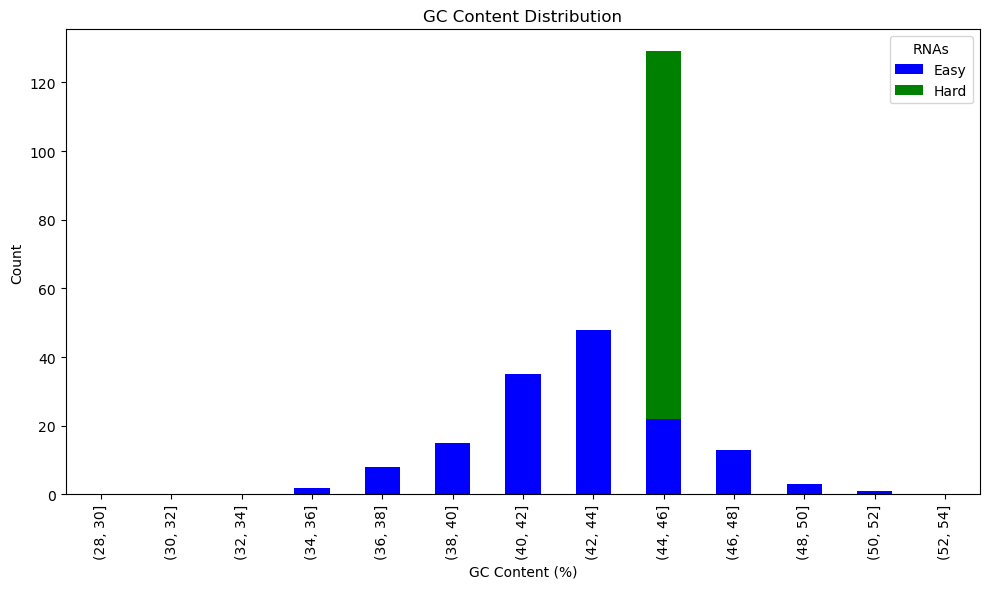

In [34]:
easy_hi_sub["group"] = "Easy"
hard_low_sub["group"] = "Hard"

combined = pd.concat([easy_hi_sub, hard_low_sub])

# Bin gc_content into ranges (adjust bin size as needed)
bins = range(28, 56, 2)  # e.g., bins of width 5 if gc_content is %
combined["gc_bin"] = pd.cut(combined["gc_content"] * 100, bins)

# Count occurrences per bin per group
counts = combined.groupby(["gc_bin", "group"]).size().unstack(fill_value=0)

# Make stacked bar chart
counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["blue", "green"]
)

plt.title("GC Content Distribution")
plt.xlabel("GC Content (%)")
plt.ylabel("Count")
plt.legend(title="RNAs")
plt.tight_layout()
plt.show()

In [49]:
print(hard_low_sub["sequence_entropy"].min(), hard_low_sub["sequence_entropy"].max())
print(easy_hi_sub["sequence_entropy"].min(), easy_hi_sub["sequence_entropy"].max())

0.9556239477676988 0.9733414937031204
0.9005956990341901 0.974165974837911


/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_9699/2676217149.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby(["len_bin", "group"]).size().unstack(fill_value=0)


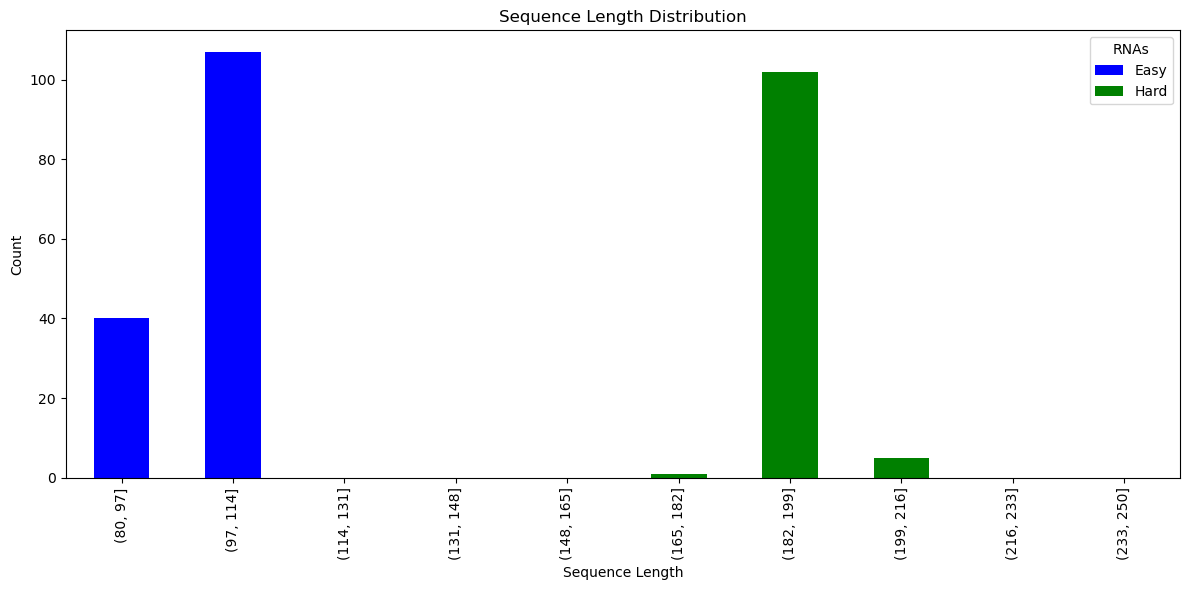

In [39]:
bins = range(80, 251, 17)
combined["len_bin"] = pd.cut(combined["length"], bins)

# Count sequences per bin per group
counts = combined.groupby(["len_bin", "group"]).size().unstack(fill_value=0)

# Plot stacked bar chart
counts.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=["blue", "green"]
)

plt.title("Sequence Length Distribution")
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.legend(title="RNAs")
plt.tight_layout()
plt.show()

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_9699/2127617149.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby(["mfe_bin", "group"]).size().unstack(fill_value=0)


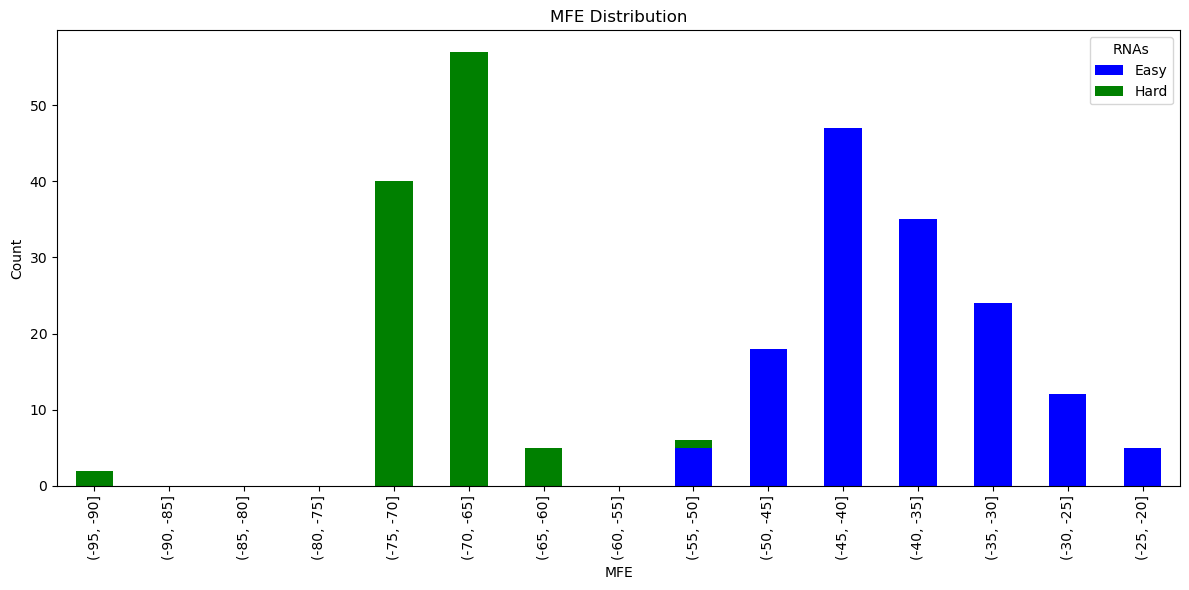

In [45]:
bins = list(range(-20, -100, -5))
bins = bins[::-1]
combined["mfe_bin"] = pd.cut(combined["mfe"], bins)

# Count sequences per bin per group
counts = combined.groupby(["mfe_bin", "group"]).size().unstack(fill_value=0)

# Plot stacked bar chart
counts.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=["blue", "green"]
)

plt.title("MFE Distribution")
plt.xlabel("MFE")
plt.ylabel("Count")
plt.legend(title="RNAs")
plt.tight_layout()
plt.show()

/var/folders/1f/c4zwfcn929qgw6shcb4frpjm0000gn/T/ipykernel_9699/1339976673.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = combined.groupby(["ed_bin", "group"]).size().unstack(fill_value=0)


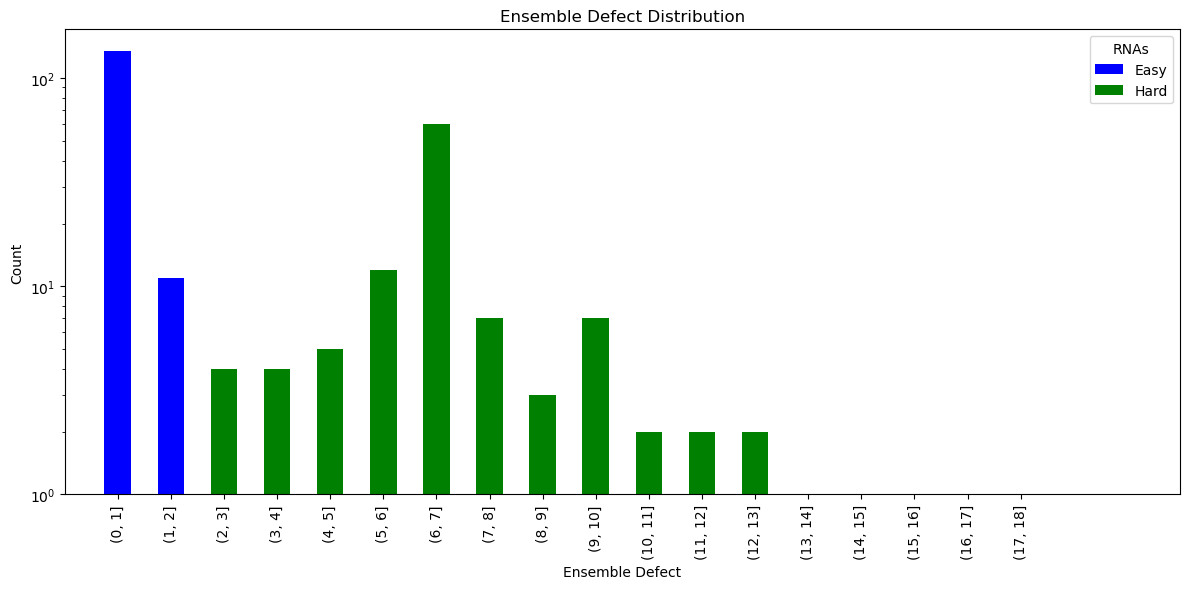

In [48]:
bins = range(0, 19, 1)
combined["ed_bin"] = pd.cut(combined["ens_def"], bins)

# Count sequences per bin per group
counts = combined.groupby(["ed_bin", "group"]).size().unstack(fill_value=0)

# Plot stacked bar chart
counts.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=["blue", "green"]
)

plt.title("Ensemble Defect Distribution")
plt.xlabel("Ensemble Defect")
plt.ylabel("Count")
plt.yscale("log")
plt.legend(title="RNAs")
plt.xlim(-1, 20)
plt.tight_layout()
plt.show()

In [ ]:
bins = range(50, 101, 5)  # e.g., bins of width 5 if gc_content is %
combined["se_bin"] = pd.cut(combined["sequence_entropy"] * 100, bins)

# Count occurrences per bin per group
counts = combined.groupby(["se_bin", "group"]).size().unstack(fill_value=0)

# Make stacked bar chart
counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["blue", "green"]
)

plt.title("Sequence Entropy Distribution")
plt.xlabel("Sequence Entropy (%)")
plt.ylabel("Count")
plt.legend(title="RNAs")
plt.tight_layout()
plt.show()